In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()  # check missing value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Here lots of missing value and lots of categorical features

## Handle Missing Values

<AxesSubplot:xlabel='Gender', ylabel='count'>

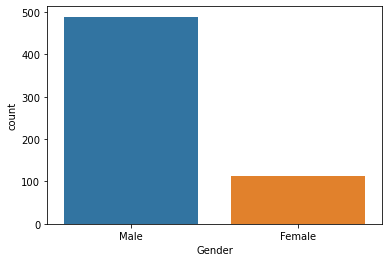

In [6]:
sns.countplot(x='Gender',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

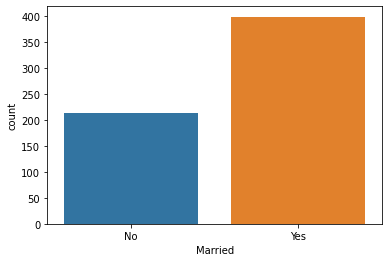

In [7]:
sns.countplot(x='Married',data=data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

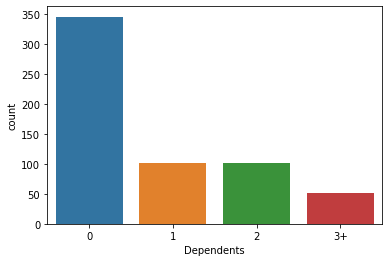

In [8]:
sns.countplot(x='Dependents',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

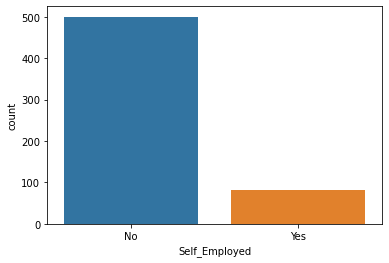

In [9]:
sns.countplot(x='Self_Employed',data=data)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

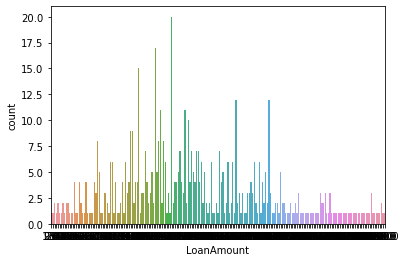

<Figure size 1440x3600 with 0 Axes>

In [10]:
sns.countplot(x='LoanAmount',data=data)
plt.figure(figsize=(20,50))
data['LoanAmount'].value_counts()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

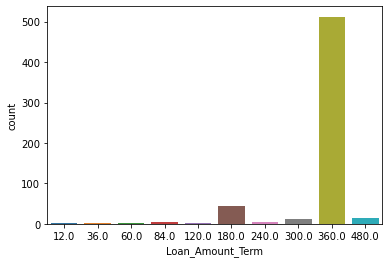

In [11]:
sns.countplot(x='Loan_Amount_Term',data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

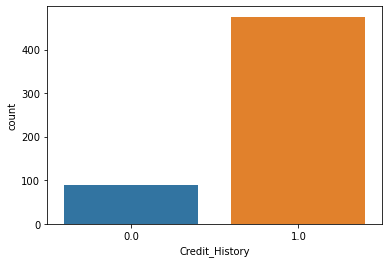

In [12]:
sns.countplot(x='Credit_History',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

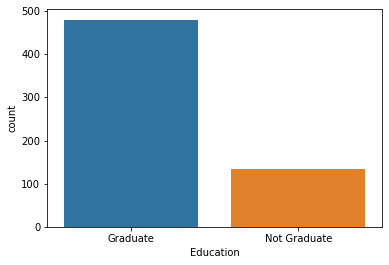

In [13]:
sns.countplot(x='Education',data=data)

In [14]:
data.shape

(614, 13)

In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
# fill missing value of self employed
data['Self_Employed'].fillna('No',inplace=True)   

In [17]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
#impute missing values for Gender
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
# Impute missing values for Married
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
# Impute missing values for Dependents
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
# Impute missing values for Credit_History
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
# Impute missing values for loan_amount_term
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [19]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Now convert categorical data into numeric data
- Loan_ID            
- Gender
- Married           
- Dependents        
- Education         
- Self_Employed     
- Property_Area     
- Loan_Status       

In [20]:
enc=LabelEncoder()

In [21]:
data['Loan_ID']=enc.fit_transform(data['Loan_ID'])
data['Gender']=enc.fit_transform(data['Gender'])
data['Married']=enc.fit_transform(data['Married'])
data['Dependents']=enc.fit_transform(data['Dependents'])
data['Education']=enc.fit_transform(data['Education'])
data['Self_Employed']=enc.fit_transform(data['Self_Employed'])
data['Property_Area']=enc.fit_transform(data['Property_Area'])
data['Loan_Status']=enc.fit_transform(data['Loan_Status'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


## Now there is no missing value and no categorical data in dataset

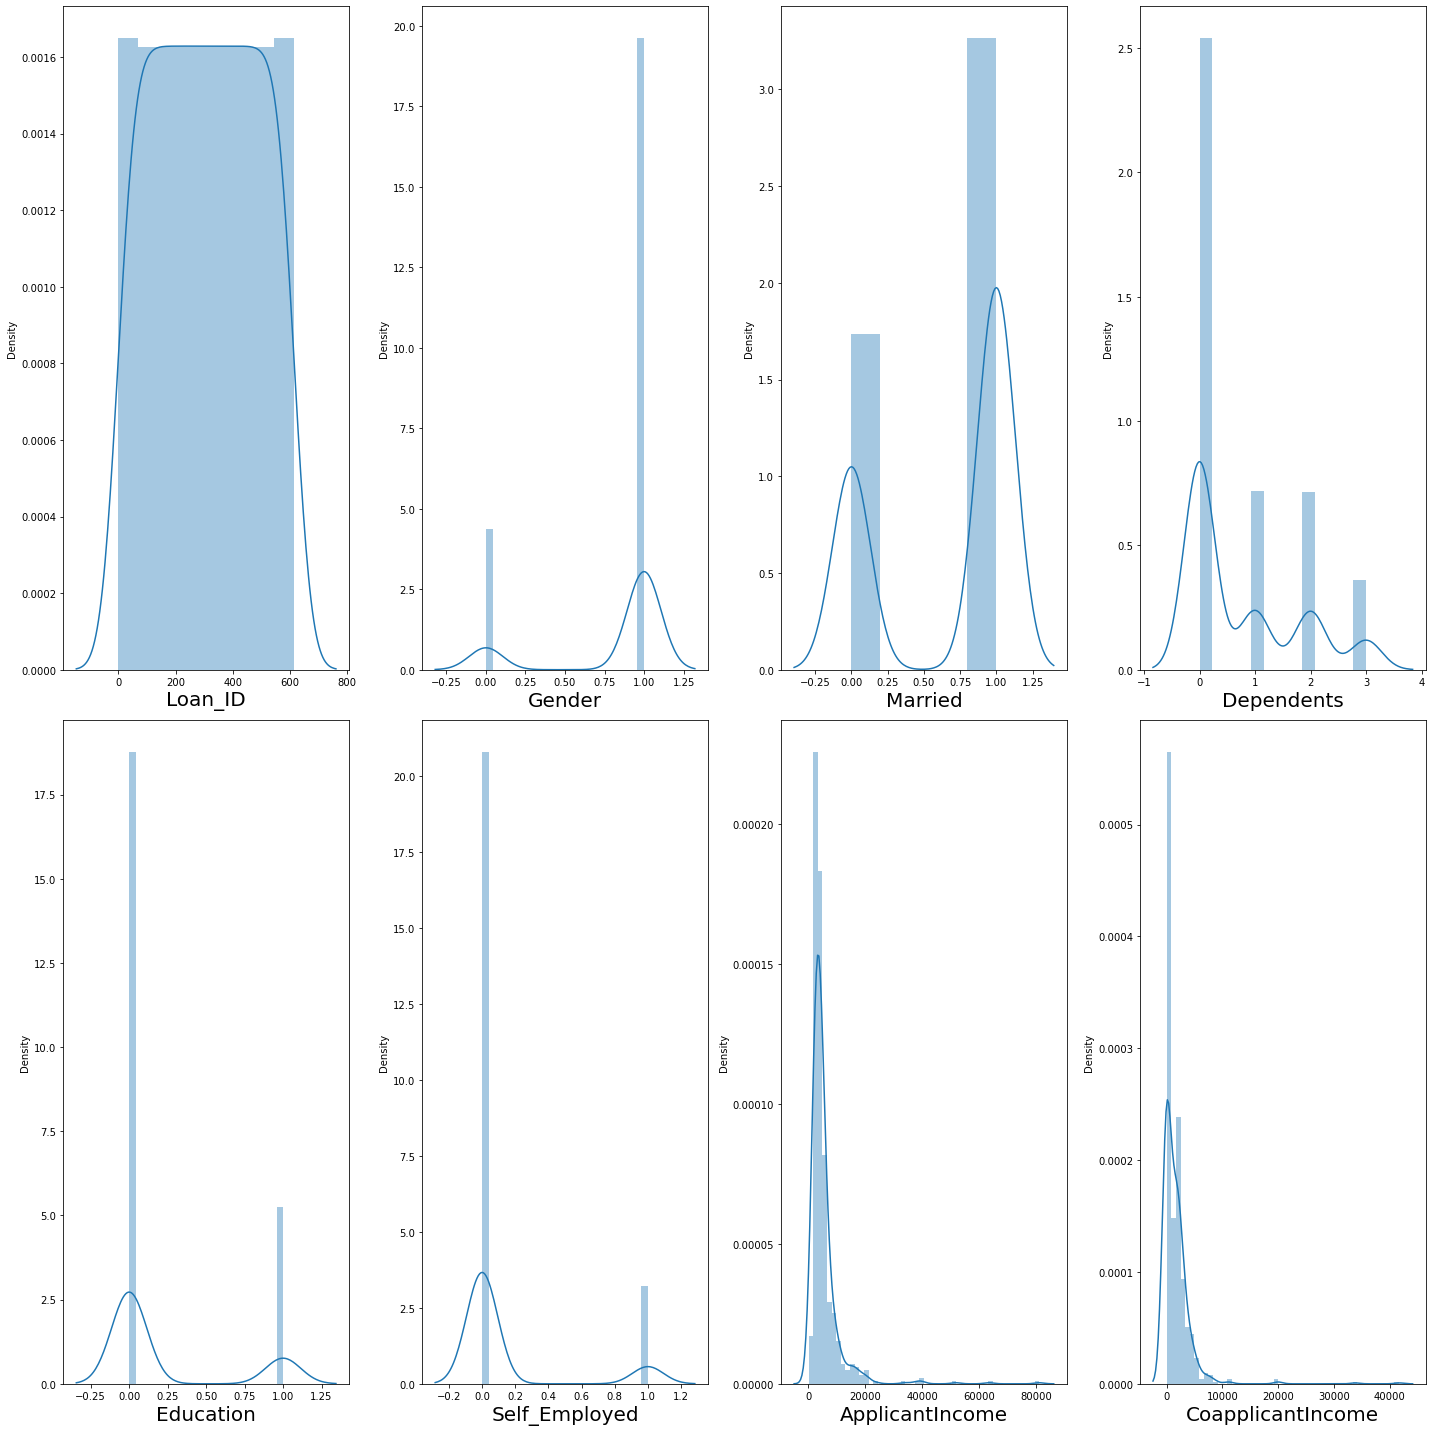

In [23]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<AxesSubplot:ylabel='Density'>

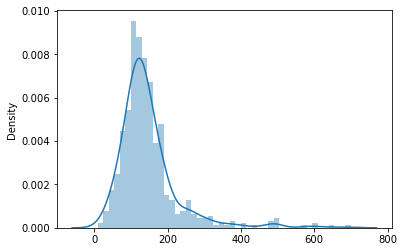

In [25]:
sns.distplot(x=data['LoanAmount'])

<AxesSubplot:ylabel='Density'>

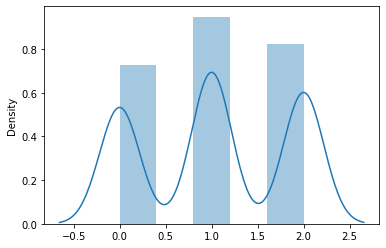

In [26]:
sns.distplot(x=data['Property_Area'])

In [27]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

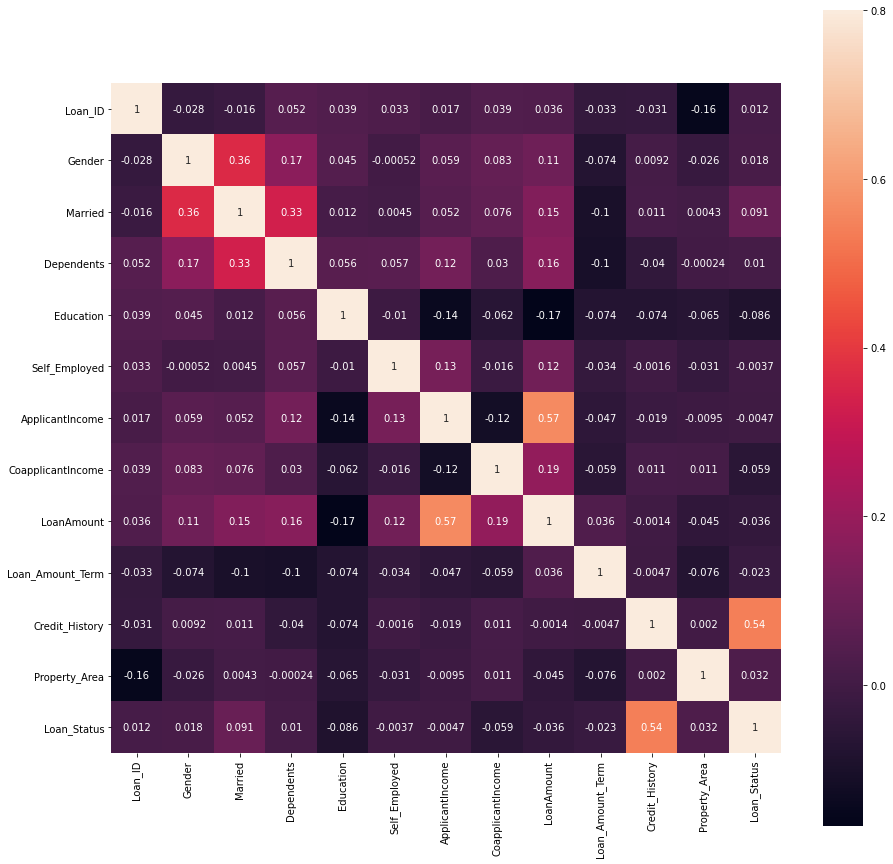

In [28]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(matrix,vmax=.8,square=True,annot = True)

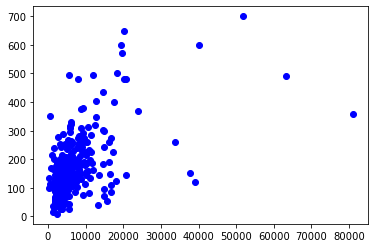

In [29]:
plt.plot(data['ApplicantIncome'],data['LoanAmount'],'bo')

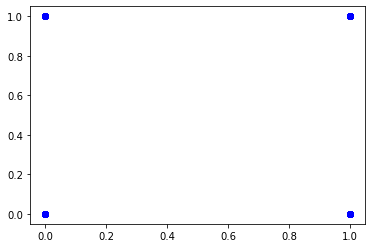

In [30]:
plt.plot(data['Credit_History'],data['Loan_Status'],'bo')

In [31]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<AxesSubplot:ylabel='Density'>

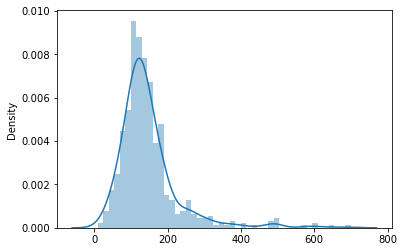

In [32]:
sns.distplot(x=data['LoanAmount'])

<AxesSubplot:ylabel='Density'>

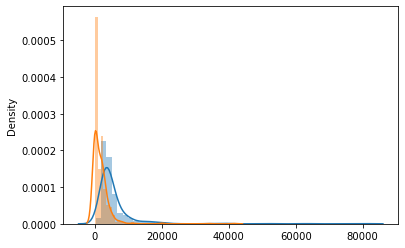

In [33]:
sns.distplot(x=data['ApplicantIncome'],bins=50)
sns.distplot(x=data['CoapplicantIncome'],bins=50)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

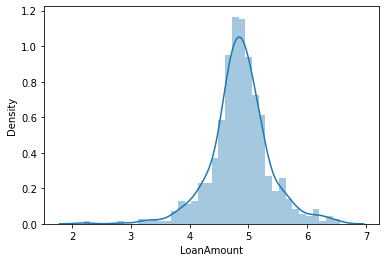

In [34]:
# Remove outlier from LoanAmount
import numpy as np
data['LoanAmount']=np.log(data['LoanAmount'])
sns.distplot(data['LoanAmount'])

In [35]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,4.862066,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,0.496575,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,2.197225,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,4.607658,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,4.859812,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,5.104426,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,6.551080,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

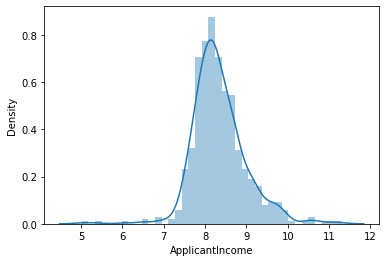

In [36]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])
sns.distplot(data['ApplicantIncome'])

In [37]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,8.341213,1621.245798,4.862066,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,0.645263,2926.248369,0.496575,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,0.000000,2.197225,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,7.964677,0.000000,4.607658,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,8.246040,1188.500000,4.859812,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,8.664750,2297.250000,5.104426,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,11.302204,41667.000000,6.551080,480.000000,1.000000,2.000000,1.000000


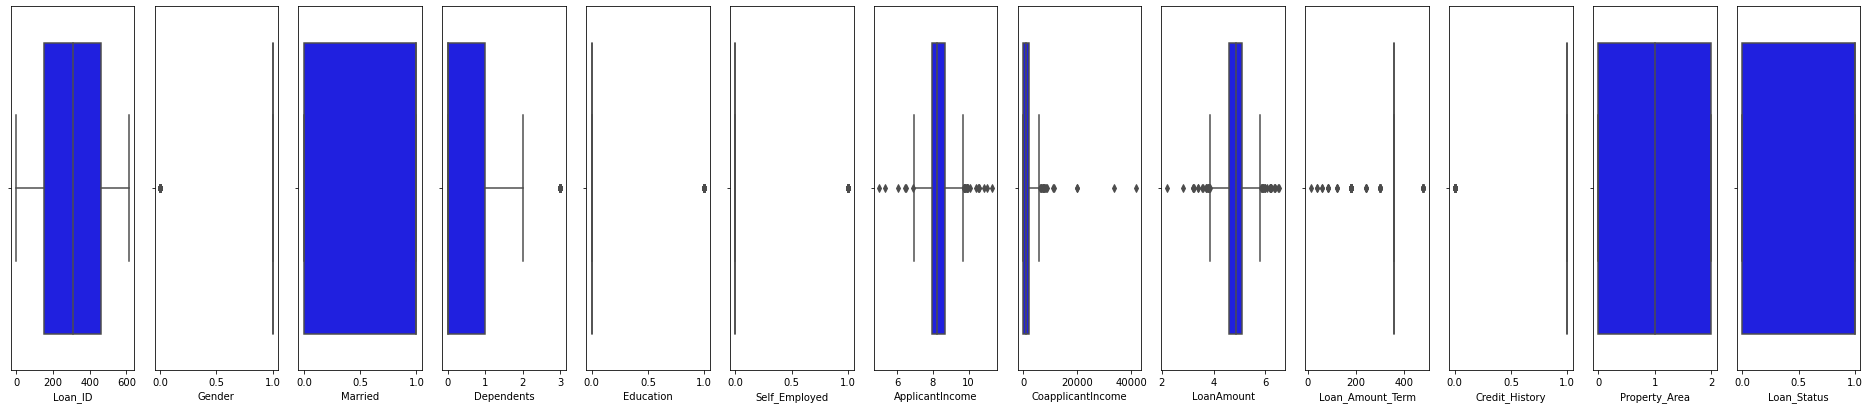

In [38]:
import matplotlib.pyplot as plt
collist=data.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [39]:
data=data.drop(columns='Loan_ID',axis=1)

In [40]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1


In [41]:
X=data.drop(columns='Loan_Status',axis=1)
y=data['Loan_Status']

In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2
1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2
3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2
4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0
610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0
611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2
612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2


In [43]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# See the outcome is in only two variables so we will use binary classification

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [45]:
lr=LogisticRegression()

In [46]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.8021739130434783
At random state 0,the testing accuracy is:-0.8376623376623377


At random state 1,the training accuracy is:-0.8195652173913044
At random state 1,the testing accuracy is:-0.7857142857142857


At random state 2,the training accuracy is:-0.8239130434782609
At random state 2,the testing accuracy is:-0.7727272727272727


At random state 3,the training accuracy is:-0.8
At random state 3,the testing accuracy is:-0.8506493506493507


At random state 4,the training accuracy is:-0.8152173913043478
At random state 4,the testing accuracy is:-0.7857142857142857


At random state 5,the training accuracy is:-0.8130434782608695
At random state 5,the testing accuracy is:-0.8116883116883117


At random state 6,the training accuracy is:-0.808695652173913
At random state 6,the testing accuracy is:-0.8181818181818182


At random state 7,the training accuracy is:-0.8065217391304348
At random state 7,the testing accuracy is:-0.8246753246753247




At random state 64,the training accuracy is:-0.8108695652173913
At random state 64,the testing accuracy is:-0.8116883116883117


At random state 65,the training accuracy is:-0.8282608695652174
At random state 65,the testing accuracy is:-0.7532467532467533


At random state 66,the training accuracy is:-0.8043478260869565
At random state 66,the testing accuracy is:-0.8246753246753247


At random state 67,the training accuracy is:-0.8021739130434783
At random state 67,the testing accuracy is:-0.8376623376623377


At random state 68,the training accuracy is:-0.8173913043478261
At random state 68,the testing accuracy is:-0.7922077922077922


At random state 69,the training accuracy is:-0.8
At random state 69,the testing accuracy is:-0.8441558441558441


At random state 70,the training accuracy is:-0.8173913043478261
At random state 70,the testing accuracy is:-0.7922077922077922


At random state 71,the training accuracy is:-0.8239130434782609
At random state 71,the testing accuracy is:-0.77

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 5)
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
X_train_prediction = lr.predict(X_train)
X_test_prediction = lr.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("accur",training_data_accuracy)
print("Accuracy score of the test data is ", test_data_accuracy)

accur 0.8130434782608695
Accuracy score of the test data is  0.8116883116883117


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.43      0.58        46
           1       0.80      0.97      0.88       108

    accuracy                           0.81       154
   macro avg       0.84      0.70      0.73       154
weighted avg       0.82      0.81      0.79       154



# Cross Validation

In [50]:
pred_lr=lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 80.94462540716613
accuracy_score is:- 81.16883116883116


At cv:- 3
cross validation score is:- 80.45911047345768
accuracy_score is:- 81.16883116883116


At cv:- 4
cross validation score is:- 80.62346150581443
accuracy_score is:- 81.16883116883116


At cv:- 5
cross validation score is:- 80.78368652538984
accuracy_score is:- 81.16883116883116


At cv:- 6
cross validation score is:- 80.62059775366457
accuracy_score is:- 81.16883116883116


At cv:- 7
cross validation score is:- 80.95051500223914
accuracy_score is:- 81.16883116883116


At cv:- 8
cross validation score is:- 80.62414559125087
accuracy_score is:- 81.16883116883116


At cv:- 9
cross validation score is:- 80.61949417448137
accuracy_score is:- 81.16883116883116




In [51]:
lsscore_selected=cross_val_score(lr,X,y,cv=7).mean()
print("The cv score is:",lsscore_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.8095051500223914 
The accuracy score is: 0.8116883116883117


In [53]:
cfm=confusion_matrix(y_test,X_test_prediction)
cfm

array([[ 20,  26],
       [  3, 105]], dtype=int64)

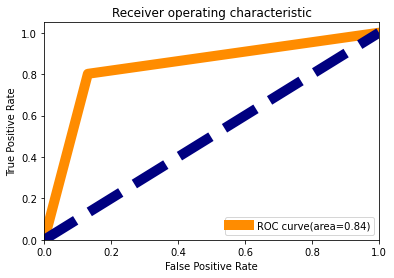

In [52]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresolds=roc_curve(X_test_prediction,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Let's use GridSearchCV for improve accuracy

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size':[10,11,14,15,18,20,25],
           'n_neighbors':[3,5,7,9,11,13]}

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56)
knn=KNeighborsClassifier()
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [77]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 9}

In [78]:
#we will use the the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10,n_neighbors=9)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=9)

In [80]:
y_pred=knn.predict(X_test)

In [81]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  6,  35],
       [  6, 107]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.50      0.15      0.23        41
           1       0.75      0.95      0.84       113

    accuracy                           0.73       154
   macro avg       0.63      0.55      0.53       154
weighted avg       0.69      0.73      0.68       154



## Model Saving

In [83]:
import pickle
filename='Loan_application.pkl'
pickle.dump(lr,open(filename,'wb'))

## Conclusion

In [84]:
a=np.array(y_test)
predicted=np.array(lr.predict(X_test))
data_con=pd.DataFrame({'Original':a,'predicted':predicted})
data_con

,Original,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
149,1,1
150,0,0
151,1,1
152,1,1
